# Airline Passenger Satisfaction Dataset

This dataset contains detailed information about airline passengers, including their demographics, travel characteristics, service ratings, and overall satisfaction. Each row represents one passenger, with numeric features (e.g. age, flight distance, delay times, service ratings) and categorical descriptors (e.g. gender, customer type, type of travel, class, satisfaction).

Source: [Airline Passenger Satisfaction – Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data)

## Data description

| Variable                                   | Definition |
| :----------------------------------------- | :--------- |
| Unnamed: 0                                | Row index (original) |
| id                                        | Passenger identifier |
| Gender                                    | Gender of the passenger |
| Customer Type                             | Loyalty status (Loyal / disloyal Customer) |
| Age                                       | Age of the passenger |
| Type of Travel                            | Purpose of travel (e.g. Business travel, Personal Travel) |
| Class                                     | Travel class (e.g. Eco, Eco Plus, Business) |
| Flight Distance                           | Distance of the flight |
| Inflight wifi service                     | Rating of inflight wifi service (0–5) |
| Departure/Arrival time convenient         | Rating of departure/arrival time convenience (0–5) |
| Ease of Online booking                    | Rating of ease of online booking (0–5) |
| Gate location                             | Rating of gate location (0–5) |
| Food and drink                            | Rating of food and drink (0–5) |
| Online boarding                           | Rating of online boarding (0–5) |
| Seat comfort                              | Rating of seat comfort (0–5) |
| Inflight entertainment                    | Rating of inflight entertainment (0–5) |
| On-board service                          | Rating of on-board service (0–5) |
| Leg room service                          | Rating of leg room service (0–5) |
| Baggage handling                          | Rating of baggage handling (0–5) |
| Checkin service                           | Rating of check-in service (0–5) |
| Inflight service                          | Rating of inflight service (0–5) |
| Cleanliness                               | Rating of cleanliness (0–5) |
| Departure Delay in Minutes                | Departure delay time in minutes |
| Arrival Delay in Minutes                  | Arrival delay time in minutes |
| satisfaction                              | Overall satisfaction label (satisfied / neutral or dissatisfied) |

## Imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import certifi

os.environ.setdefault('SSL_CERT_FILE', certifi.where())

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

## Data exploration

First we need to load the dataset.

In [30]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1BPENb6JBJvXt-7oRiH9LprkBvrHjKEqT", delimiter=",")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [31]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


We have 25965 rows and 25 clomuns. 5 of them are of the object type, others are numerical type. Column `Arrival Delay in Minutes` does have 83 null values.

In [32]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


Average age of passanger is 39 years. 
Flight distances vary widely (mean = 1,194 km, max = 4,983 km), indicating a mix of short‑ to long‑haul flights. Service ratings (wifi, booking, boarding, comfort, entertainment, cleanliness, etc.) are around 3–4 suggesting generally moderate to good perceived service rather than extreme satisfaction or dissatisfaction.

Number of satisfaction levels: 2 - ['satisfied' 'neutral or dissatisfied']


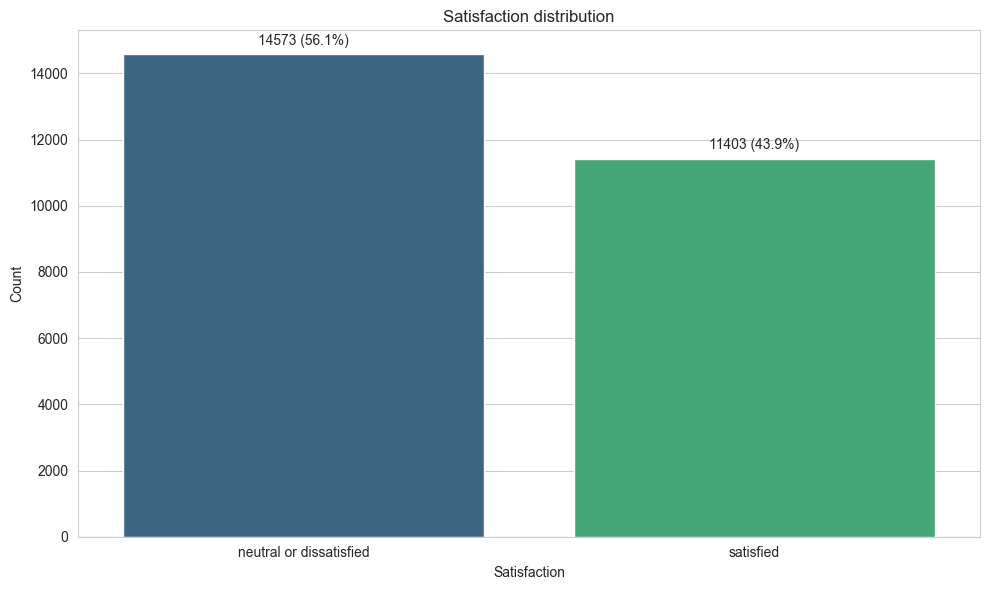

In [33]:
satisfaction = df['satisfaction'].unique()
print(f'Number of satisfaction levels: {len(satisfaction)} - {satisfaction}')

satisfaction_values = df['satisfaction'].value_counts()

total = satisfaction_values.sum()
percentages = (satisfaction_values / total * 100).round(1)

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = sns.barplot(x=satisfaction_values.index, y=satisfaction_values.values, palette="viridis", hue=satisfaction_values.index, dodge=False, legend=False)
ax.set_title("Satisfaction distribution")
ax.set_xlabel("Satisfaction")
ax.set_ylabel("Count")
for p, (cat, count) in zip(ax.patches, satisfaction_values.items()):
    height = p.get_height()
    pct = percentages[cat]
    ax.annotate(f"{int(count)} ({pct}%)",
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

56.1 % are netural or not sattisfied. 43.9% are satisfied.

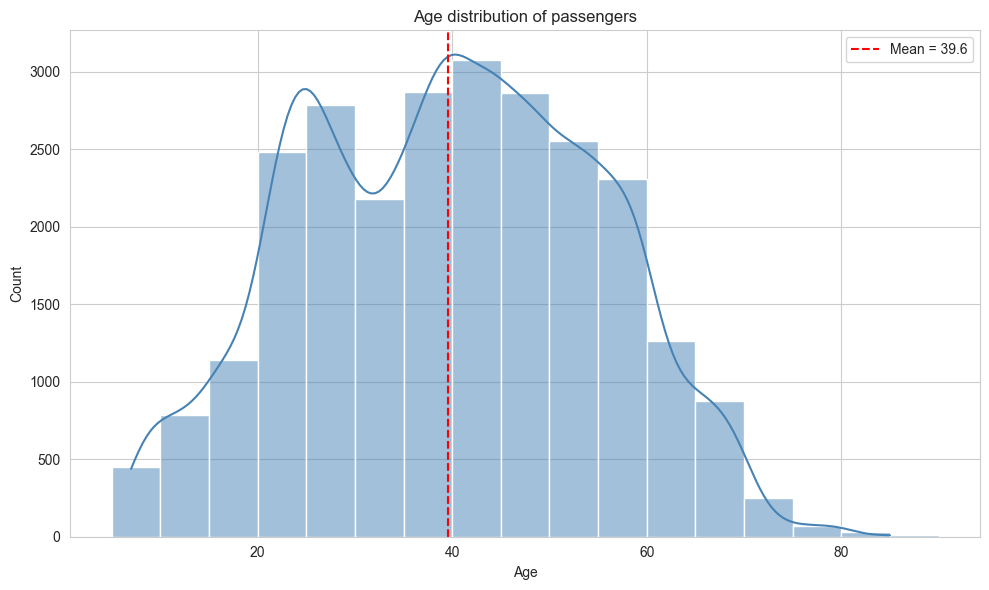

Lowest age: 7, Highest age: 85, Mean age: 39.6


In [34]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ages = df['Age'].dropna()
bins = range(int(ages.min())//5*5, int(ages.max()) + 6, 5)
ax = sns.histplot(ages, bins=bins, kde=True, color='steelblue')
ax.set_title("Age distribution of passengers")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
mean_age = ages.mean()
ax.axvline(mean_age, color='red', linestyle='--', label=f"Mean = {mean_age:.1f}")
ax.legend()
plt.tight_layout()
plt.show()
print(f'Lowest age: {ages.min()}, Highest age: {ages.max()}, Mean age: {mean_age:.1f}')

Most passengers are between their late 20s and mid‑50s, with a clear peak around 40 years old. The age distribution is slightly right‑skewed, indicating fewer older passengers compared to middle‑aged adults, and very young or very old travelers are relatively rare.

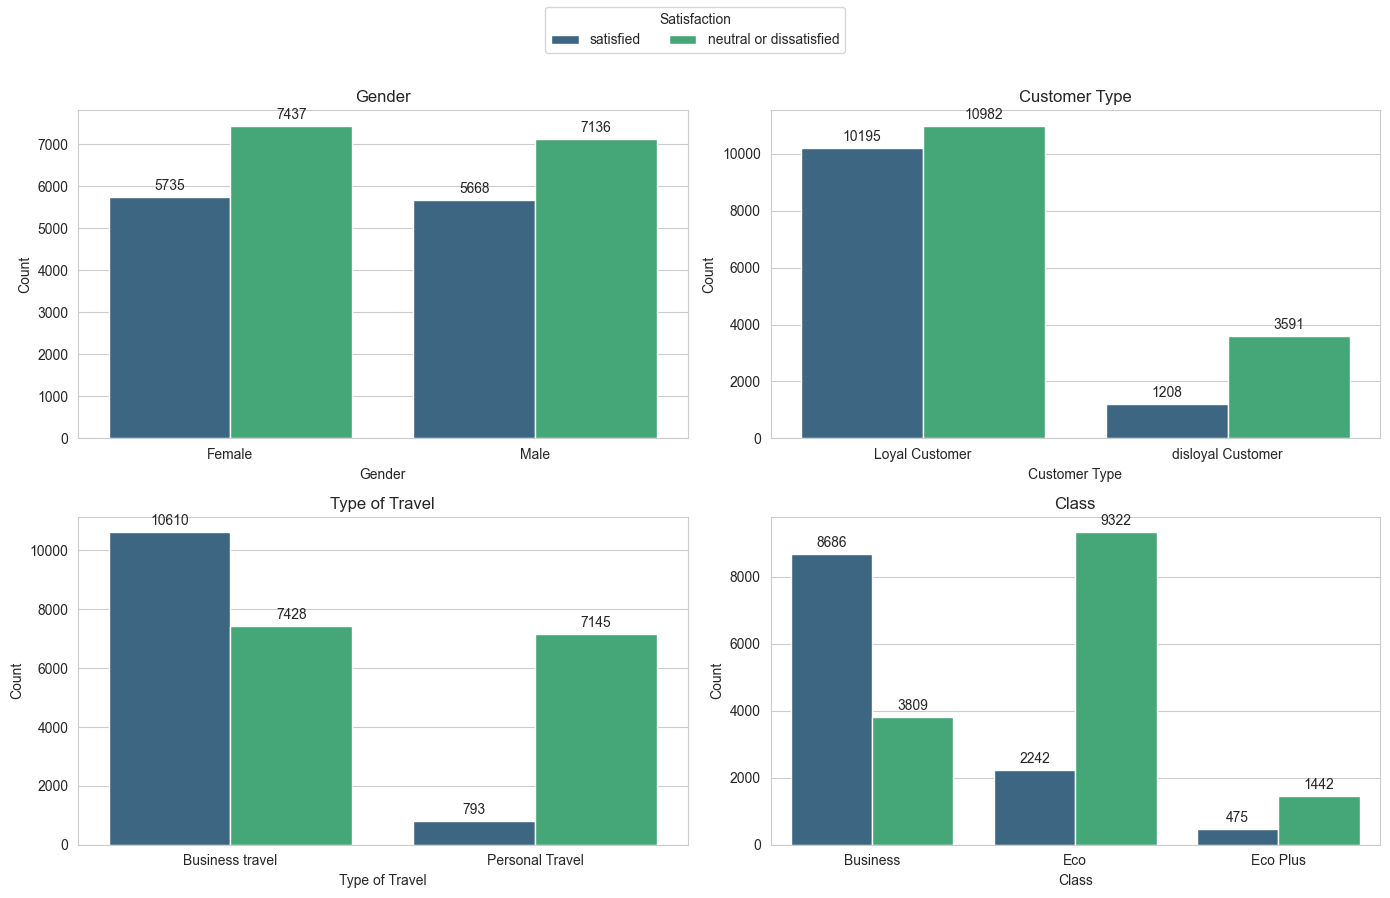

In [35]:
# One figure with subplots: counts for key categorical features by satisfaction
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']  # satisfaction used as hue

# keep only existing columns and only those that have satisfaction as well
categorical_cols = [c for c in categorical_cols if c in df.columns]

n = len(categorical_cols)
cols = 2
rows = (n + cols - 1) // cols

sns.set_style("whitegrid")
fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 4.5 * rows))
axes = axes.flatten()

palette = sns.color_palette("viridis", df['satisfaction'].nunique())

for ax, cat in zip(axes, categorical_cols):
    sns.countplot(data=df, x=cat, hue='satisfaction', palette=palette, ax=ax, order=df[cat].value_counts().index)
    ax.set_title(f"{cat}")
    ax.set_xlabel(cat)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=0)
    # annotate bars with counts
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{int(height)}",
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom',
                        xytext=(0, 3), textcoords='offset points')

# hide any unused subplots
for j in range(len(categorical_cols), len(axes)):
    axes[j].set_visible(False)

# put legend outside the grid once
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Satisfaction', loc='upper center', ncol=len(labels))
for ax in axes:
    ax.legend_.remove() if ax.get_legend() else None

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

**Gender:** Both male and female passengers tend to be more often neutral/dissatisfied than satisfied, with no major gender gap.

**Customer Type:** Loyal customers are mostly satisfied, while disloyal customers are dominated by neutral/dissatisfied passengers.

**Type of Travel:** Business travel skews clearly toward satisfied passengers; personal travel is more often neutral/dissatisfied.

**Class:** Business class has more satisfied than neutral/dissatisfied customers, whereas Eco and Eco Plus are strongly skewed toward neutral/dissatisfied.


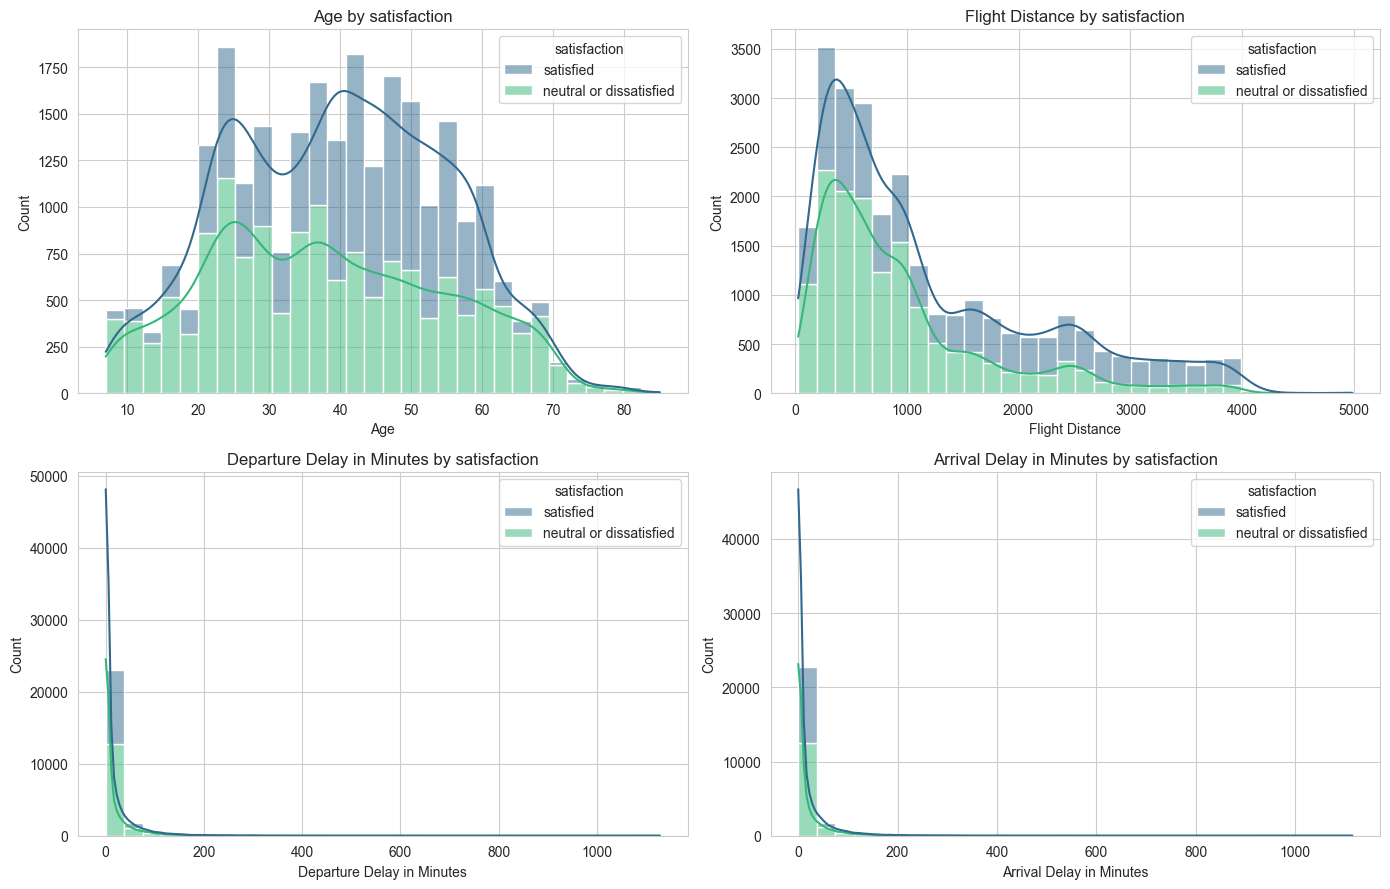

In [36]:
# Histograms: distributions of key numeric variables by satisfaction
numeric_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# keep only existing numeric columns
numeric_cols = [c for c in numeric_cols if c in df.columns]

sns.set_style("whitegrid")

n = len(numeric_cols)
cols = 2
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 4.5 * rows))
axes = axes.flatten()

palette = sns.color_palette("viridis", df['satisfaction'].nunique())

for ax, col in zip(axes, numeric_cols):
    # Plot histogram with satisfaction as hue using histplot
    sns.histplot(data=df, x=col, hue='satisfaction',
                 multiple='stack', palette=palette, ax=ax, kde=True, bins=30)
    ax.set_title(f"{col} by satisfaction")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

# hide any unused subplots
for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Age:** Satisfied passengers cluster more in the late‑30s to mid‑50s range, while neutral/dissatisfied travelers show a broader spread, including more younger and older passengers.

**Flight Distance:** Satisfied passengers tend to fly on longer routes on average, whereas neutral/dissatisfied passengers are more concentrated on shorter to medium distances.

**Departure Delay:** Neutral/dissatisfied passengers experience slightly higher and more variable departure delays, with more extreme long delays than satisfied passengers.

**Arrival Delay:** Arrival delays are also more spread out and extreme for neutral/dissatisfied passengers, suggesting that punctuality issues are linked to lower satisfaction.

/var/folders/t9/t768kkk909v14w5njftdcxh80000gn/T/ipykernel_33674/536357674.py:33: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(
/var/folders/t9/t768kkk909v14w5njftdcxh80000gn/T/ipykernel_33674/536357674.py:33: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(
/var/folders/t9/t768kkk909v14w5njftdcxh80000gn/T/ipykernel_33674/536357674.py:33: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(
/var/folders/t9/t768kkk909v14w5njftdcxh80000gn/T/ipykernel_33674/536357674.py:33: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(


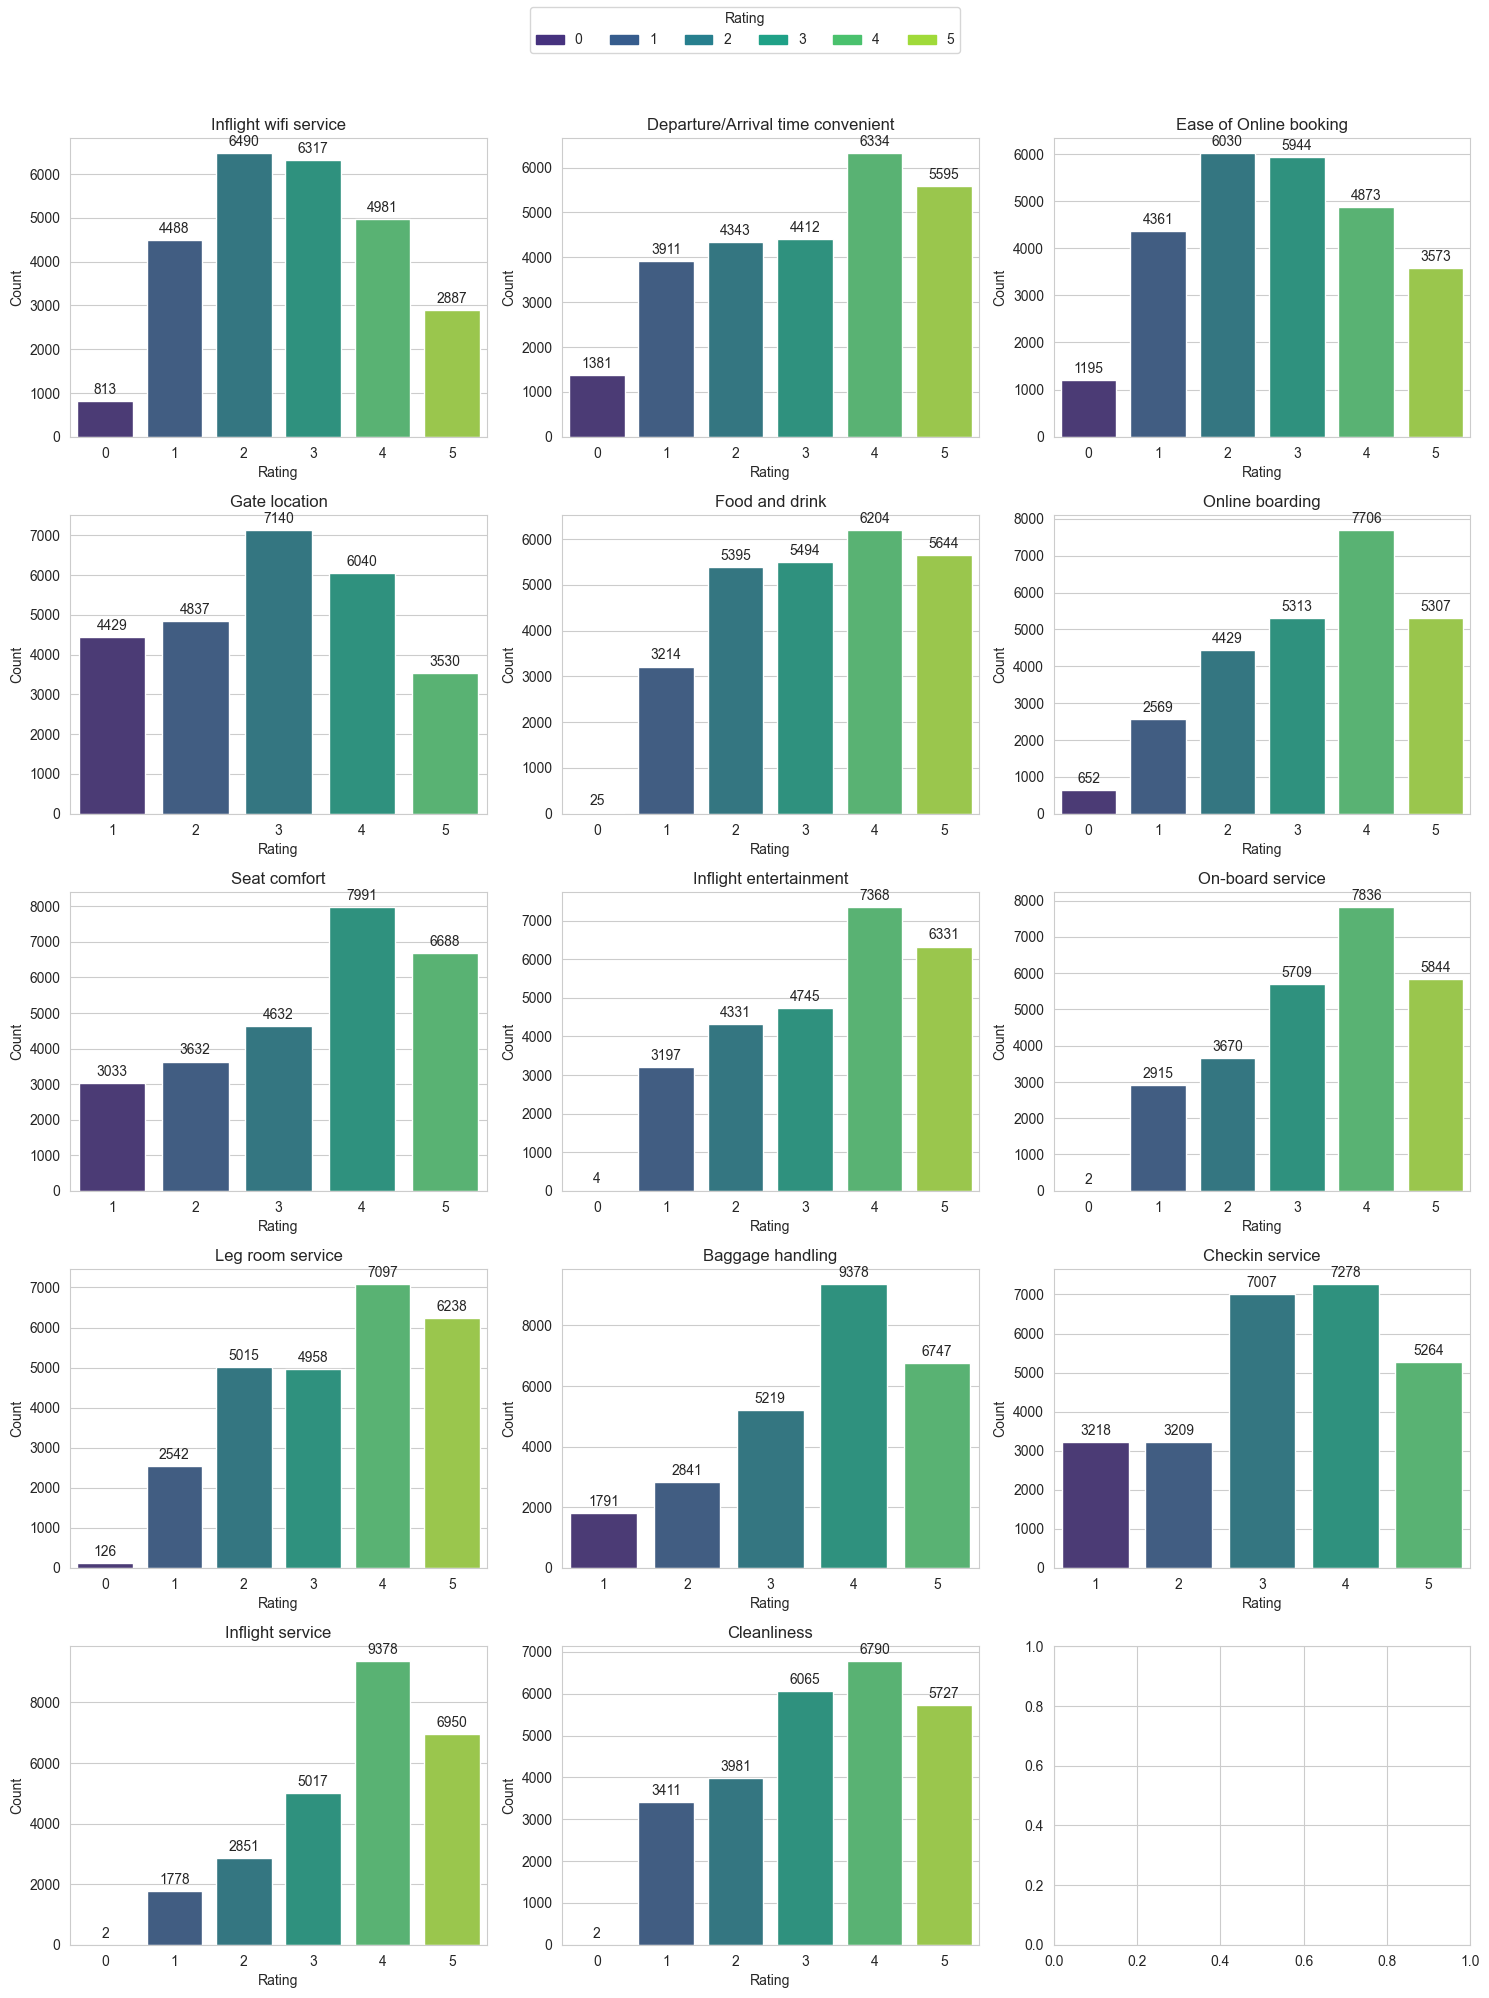

In [37]:
# Bar charts for rating features (vertical, counts only)
rating_cols = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

# keep only rating columns that exist in the dataframe
rating_cols = [c for c in rating_cols if c in df.columns]

sns.set_style("whitegrid")
palette = sns.color_palette("viridis")

n = len(rating_cols)
cols = 3
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for ax, col in zip(axes, rating_cols):
    counts = df[col].value_counts().sort_index()
    sns.barplot(
        x=counts.index,
        y=counts.values,
        ax=ax,
        palette=palette,
        hue=counts.index,
        dodge=False
    )
    ax.set_title(col)
    ax.set_xlabel("Rating")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=0)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(
                f"{int(height)}",
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                xytext=(0, 3),
                textcoords='offset points'
            )
    if ax.get_legend():
        ax.get_legend().remove()

# single legend outside the grid
handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(len(counts.index))]
labels = [str(r) for r in counts.index]
fig.legend(handles, labels, title='Rating', loc='upper center', ncol=len(labels))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

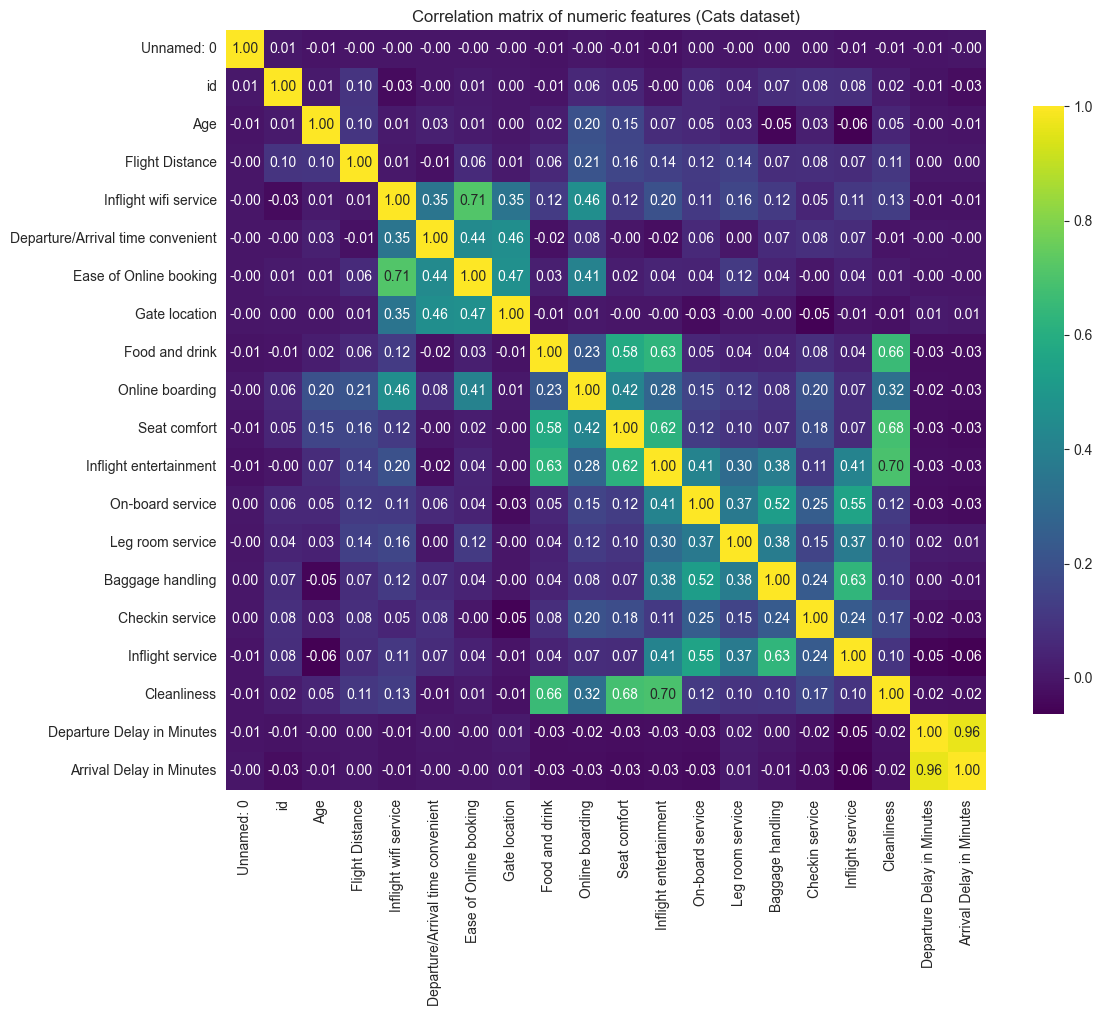

In [38]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

corr = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation matrix of numeric features (Cats dataset)")
plt.tight_layout()
plt.show()

**Strong delay relationship:** Departure Delay in Minutes and Arrival Delay in Minutes are almost perfectly correlated (≈0.96), meaning departure delays almost always propagate to arrival delays.

**Service quality cluster:** Ratings like Food and drink, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, and Cleanliness show moderate to strong positive correlations with each other. This suggests that passengers tend to evaluate multiple service aspects consistently (good or bad together).

**Online experience linkage:** Ease of Online booking and Online boarding correlate well with each other and with overall service ratings, indicating that a smooth digital experience is associated with better perceptions of onboard services.

**Timing convenience:** Departure/Arrival time convenient has moderate positive correlations with other service ratings, implying that convenient flight times go hand-in-hand with better overall satisfaction with the trip.


Now lets fix those null values inside the `Arrival Delay in Minutes` by fill them with 0

In [39]:
print("Nulls before:", df['Arrival Delay in Minutes'].isnull().sum())
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)
print("Nulls after:", df['Arrival Delay in Minutes'].isnull().sum())

Nulls before: 83
Nulls after: 0


Checking outliers if there are any

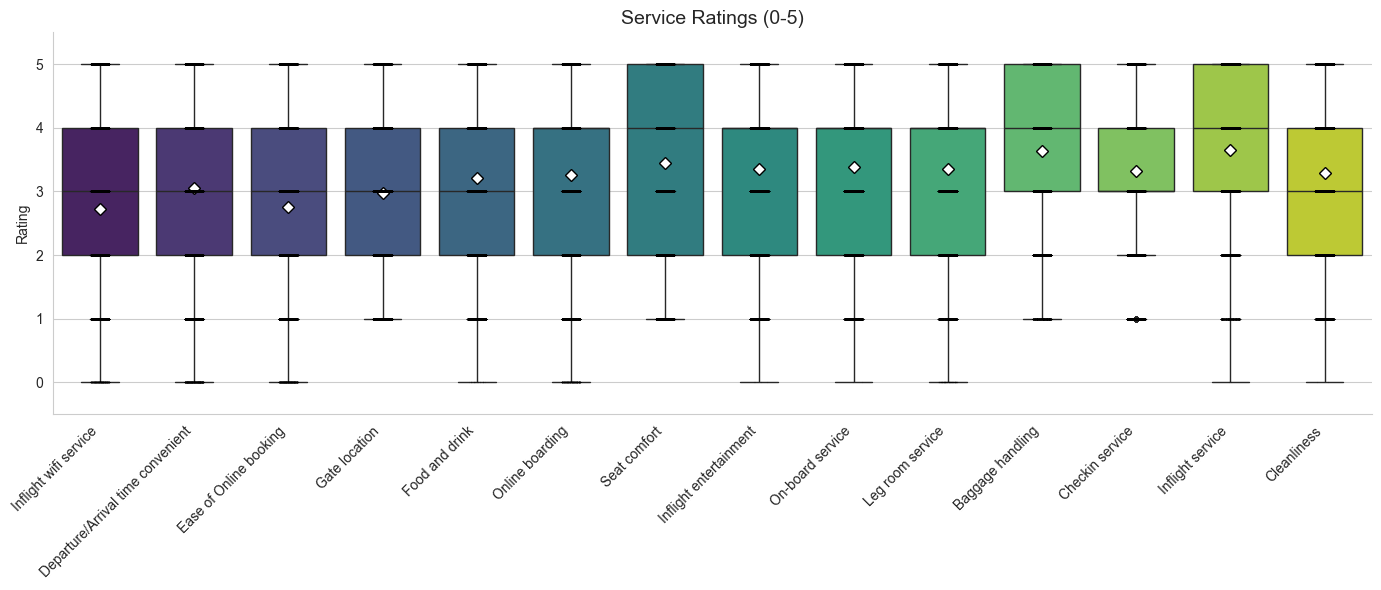

In [40]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")

# use the existing rating_cols list
data = df[rating_cols]
palette = sns.color_palette("viridis", len(rating_cols))

# main boxplots with mean marker and lighter fliers
ax = sns.boxplot(
  data=data,
  palette=palette,
  showmeans=True,
  meanprops={"marker":"D", "markeredgecolor":"black", "markerfacecolor":"white"},
  flierprops={"marker":"o", "markersize":3, "alpha":0.4}
)

# lightweight jittered points to show underlying distribution
sns.stripplot(data=data, color="k", size=1, alpha=0.15, jitter=True)

ax.set_title("Service Ratings (0-5)", fontsize=14)
ax.set_ylabel("Rating")
ax.set_xlabel("")
ax.set_xticks(range(len(rating_cols)))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.ylim(-0.5, 5.5)
sns.despine(trim=False)
plt.tight_layout()
plt.show()

In [41]:
df['Checkin service'].value_counts()

Checkin service
4    7278
3    7007
5    5264
1    3218
2    3209
Name: count, dtype: int64

We will not remove the outliers because they represent a substantial portion of the dataset and likely reflect genuine variability (e.g., long‑haul flights, extreme delays). Dropping them could introduce bias and distort downstream analyses. Instead, we will handle their influence using robust techniques where appropriate (robust scaling or median/IQR summaries, transformations, winsorization, or model choices that are less sensitive to extreme values). But lets check the other numerical values.

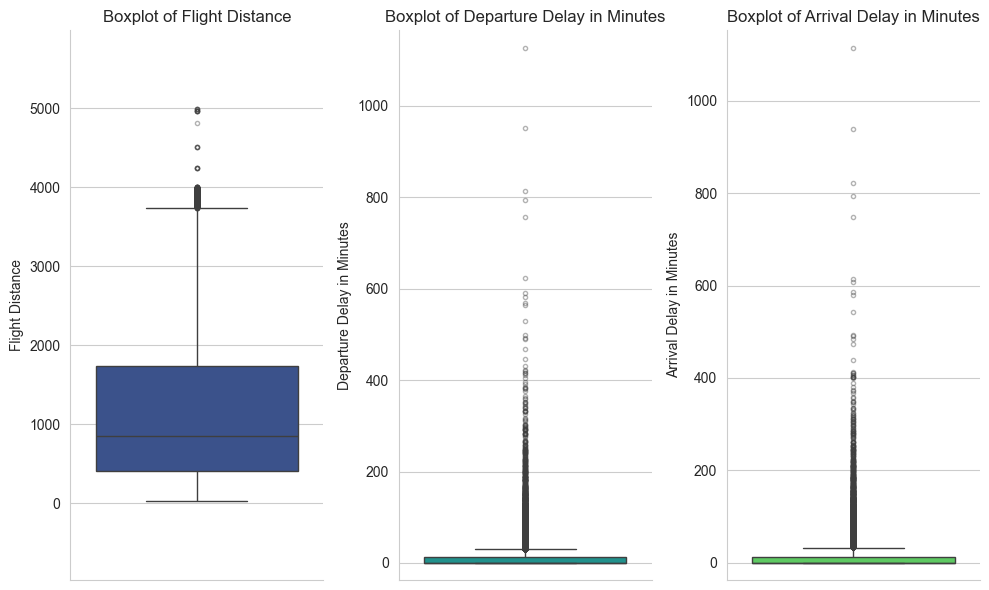

In [42]:
numerical_cols = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
palette = sns.color_palette("viridis", len(numerical_cols))
for col in numerical_cols:
    plt.subplot(1, 3, numerical_cols.index(col) + 1)
    sns.boxplot(y=df[col], flierprops={"marker":"o", "markersize":3, "alpha":0.4}, boxprops={"facecolor":palette[numerical_cols.index(col)]})
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.xlabel('')
    plt.ylim(df[col].min() - (df[col].std()), df[col].max() + (df[col].std()))
    sns.despine(trim=False)
plt.tight_layout()
plt.show()


### Outliers — observations and plan

Flight Distance and delay variables contain many extreme but likely valid values. Do not drop; instead:

- Inspect: flag using IQR (1.5×) and |z|>3; visualize with boxplots/histograms/scatter (use log-scale where helpful).
- Treat: use robust transforms/scalers (RobustScaler, median/IQR), log/pseudo-log for skewed features, create indicator flags (e.g., long_delay), and optionally winsorize/cap for models sensitive to extremes. Always keep original columns.
- Modeling: prefer robust methods (tree‑based or robust loss) and run sensitivity analyses (with/without capping).
- Document thresholds, rationale, and keep both original and transformed variables.

Next: implement IQR/z‑score inspection, visualize flagged rows, then apply chosen transforms while retaining originals.


In [43]:
outliers = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Checkin service']

for col in outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[(df[col] > upper_bound), col] = upper_bound
    df.loc[(df[col] < lower_bound), col] = lower_bound

/var/folders/t9/t768kkk909v14w5njftdcxh80000gn/T/ipykernel_33674/2250244192.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] > upper_bound), col] = upper_bound


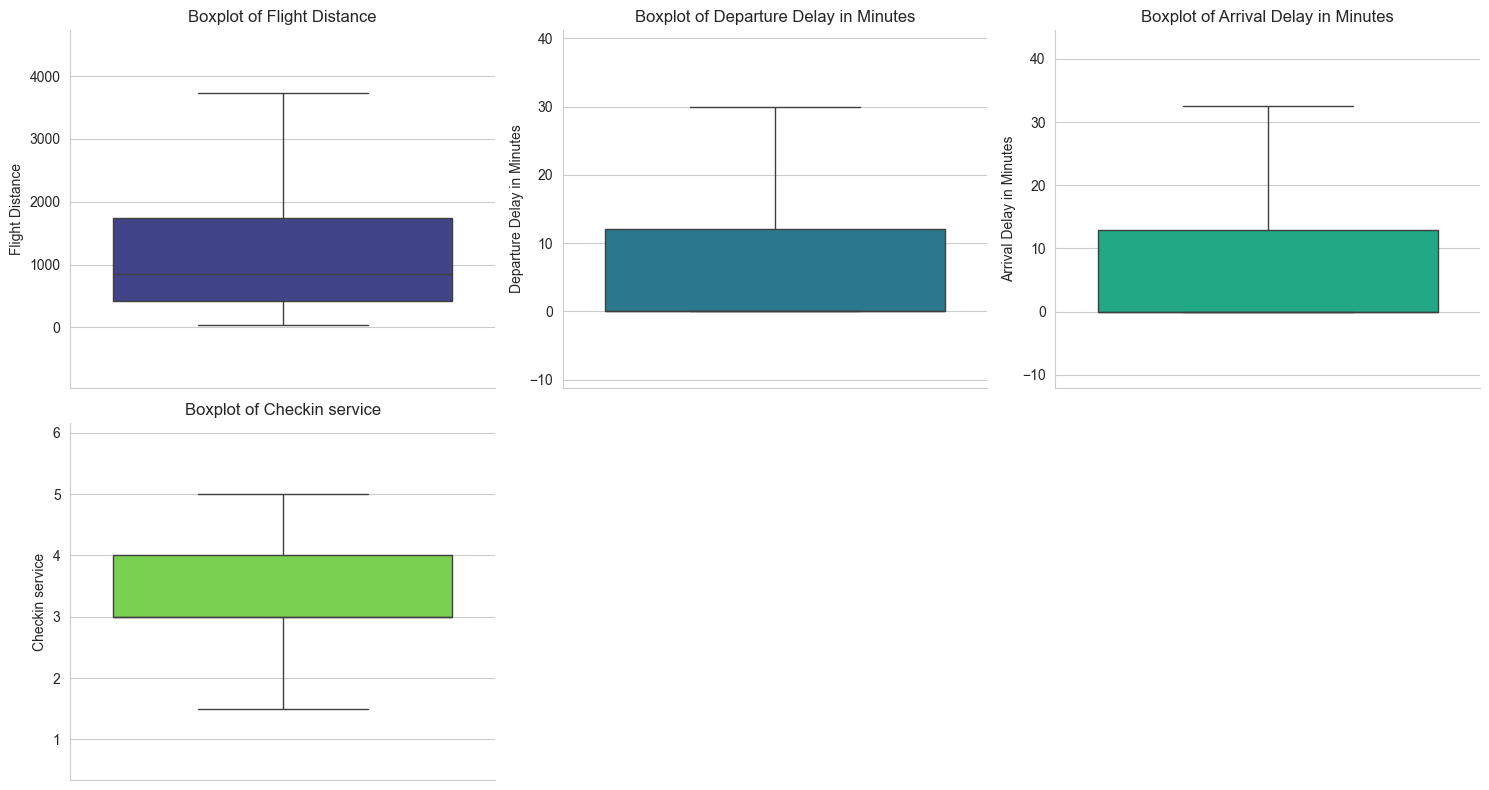

In [44]:
# dynamic subplot layout to match number of outliers
n = len(outliers)
cols = 3
rows = (n + cols - 1) // cols

sns.set_style("whitegrid")
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = np.array(axes).ravel()

palette = sns.color_palette("viridis", n)

for i, col in enumerate(outliers):
  ax = axes[i]
  sns.boxplot(
    y=df[col],
    ax=ax,
    flierprops={"marker":"o", "markersize":3, "alpha":0.4},
    boxprops={"facecolor": palette[i]}
  )
  ax.set_title(f'Boxplot of {col}')
  ax.set_ylabel(col)
  ax.set_xlabel('')
  ax.set_ylim(df[col].min() - df[col].std(), df[col].max() + df[col].std())
  sns.despine(ax=ax, trim=False)

# hide any unused subplots
for j in range(n, len(axes)):
  axes[j].set_visible(False)

plt.tight_layout()
plt.show()

And now we drop unnecesary columns

In [45]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True, errors='ignore')
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2.0,5,5,30,32.5,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3.0,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2.0,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3.0,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4.0,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4.0,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5.0,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5.0,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4.0,5,4,0,0.0,satisfied


# Data preprocessing
Lets drop the target variable and other unneseary columns

In [46]:
df_clustering = df.drop(columns=['satisfaction', 'Age'])

In [47]:
df_encoded = pd.DataFrame(index=df_clustering.index)
label_mapping = {
  'Gender': {'Female': 0, 'Male': 1}
}
df_encoded['Gender'] = df_clustering['Gender'].map(label_mapping['Gender']).astype(float)
df_encoded = df_encoded.join(pd.get_dummies(df_clustering[['Customer Type', 'Type of Travel', 'Class']], dtype=float).set_index(df_clustering.index))
numerical_cols = numeric_cols + rating_cols 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering[numerical_cols])
df_encoded[numerical_cols] = pd.DataFrame(scaled_data, index=df_clustering.index, columns=numerical_cols)
df_encoded

KeyError: "['Age'] not in index"